In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

In [2]:
data_set = pd.read_csv(r'random_songs_processed_dataset.csv',encoding='utf-8')
data_set.head(3)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,loudness_stand,loudness_norm,tempo_norm,views,upload_date,days_since_upload,days_views_ratio,youtube_popularity,spotify_popularity,youtube_spotify_popularity_ratio
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,...,-7.678,0.792109,0.815763,156534403,Jun 23 2018,253,10000.000000,100.0,44,2.272727
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,...,-7.259,0.802377,0.636079,27490037,Jul 26 2018,220,10000.000000,100.0,10,10.000000
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,...,-5.890,0.835927,0.459895,619066,Aug 3 2018,212,2920.122642,30.0,63,0.476190


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C6E2D3A58>]],
      dtype=object)

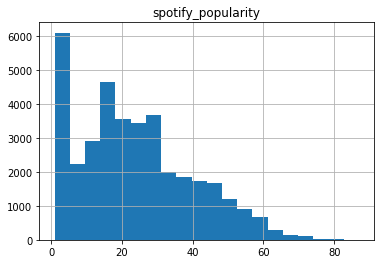

In [3]:
data_set.hist(column='spotify_popularity',bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C6F167B70>]],
      dtype=object)

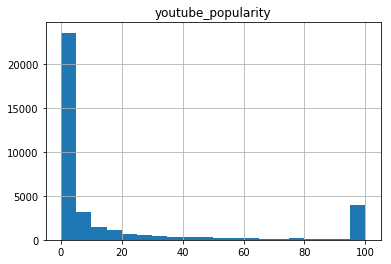

In [4]:
data_set.hist(column='youtube_popularity',bins = 20)

unfortunatly, the histograms of popularity are not really similar when comparing the ones given by spotify and the one we calculated from youtube (normalized ratio of youtube rate/days since uploaded). we can see that the main different is that almost a half of the youtube tracks got the score 0. We tried applying different monotonous functions that are blocked from above by 1(1-c/(x+1) and exp(-c/x)), in order to equalize the histogram. Those functions made a small change in the histogram, but the change in the pearson coeficcient was minor (max r was about 0.3).

In [5]:
len(data_set[data_set.youtube_popularity==1])

17383

we can see that the popularity extracted from youtube and the popularity given from spotify are not correlated

In [6]:
pearson_co,p_val = pearsonr(data_set.youtube_popularity,data_set.spotify_popularity)
pearson_co

0.2981656897218889

In [7]:
p_val

0.0

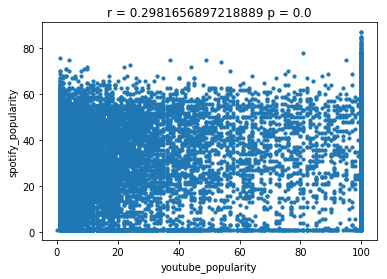

In [11]:
plt.scatter(data_set.youtube_popularity,data_set.spotify_popularity,s=10)
plt.xlabel('youtube_popularity')
plt.ylabel('spotify_popularity')
plt.title('r = ' + str(pearson_co) + " p = " + str(p_val))
plt.savefig('spotify_youtube_popularity_scatter.png')